# Jorge Gut (5.1)

Consider the following problem of Linear Programming

> $min.$ $f(x)=-7x_1+x_2$ <br>
$s.a:$ $\begin{cases}
        x_1+x_2-15 ≤ 0 \\
        2x_1-x_2-6 ≤ 0 \\
        -x_1+x_2-10 ≤ 0 \\
        x_1,x_2 ≥ 0, \in \mathbb{R}^1
        \end{cases}$ <br>

Solve it by: <br>
- Graphic Inspection
- Pyomo

## Graphic Inspection

In [5]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'png'
import numpy as np
import platform

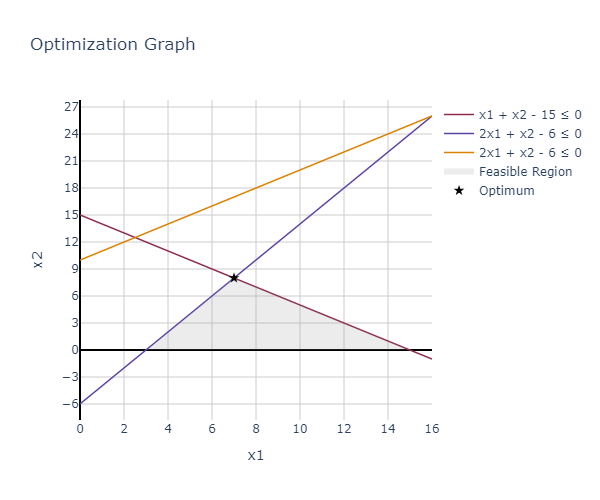

In [6]:
fig = go.Figure()

x1 = np.linspace(0, 16, 10)
# x1 + x2 - 15 ≤ 0
x2_1 = 15 - x1
fig.add_scatter(
    x=x1, y=x2_1,
    mode='lines',
    line={'color':'#8e2c50',
            'width':1.5},
    name='x1 + x2 - 15 ≤ 0'
)

# 2x1 - x2 - 6 ≤ 0
x2_2 = 2*x1-6
fig.add_scatter(
    x=x1, y=x2_2,
    mode='lines',
    line={'color':'#5e43a5',
            'width':1.5},
    name='2x1 + x2 - 6 ≤ 0'
)

# -x1 + x2 - 10 ≤ 0
x2_3 = x1+10
fig.add_scatter(
    x=x1, y=x2_3,
    mode='lines',
    line={'color':'#da8200',
            'width':1.5},
    name='2x1 + x2 - 6 ≤ 0'
)

fig.add_scatter(
    x=[3, 7, 15], y=[0, 8, 0],
    fill='tozeroy',  # Fill the area under the curve
    mode='none',
    fillcolor='rgba(150, 150, 150, 0.18)',  # Set the fill color
    name='Feasible Region'
)

# Optimum
fig.add_trace(go.Scatter(
    x=[7], 
    y=[8], 
    mode='markers', 
    marker=dict(size=8, color='black', symbol='star'),
    name='Optimum'
))

fig.layout = go.Layout(
    xaxis = {'zerolinecolor':'black',
             'gridcolor':'#cccccc',
             'title':'x1',
             'dtick':2},
    yaxis = {'zerolinecolor':'black',
             'gridcolor':'#cccccc',
             'title':'x2',
             'dtick':3},
    plot_bgcolor = 'white',
    width=600, height=500,
    title={'text':'Optimization Graph'}
)

fig.show();

## Pyomo

In [7]:
from pyomo.environ import *
# brew install glpk >> for MacOS

In [8]:
# Model Declaration
model = ConcreteModel()

# Decision Variables
model.x1 = Var()
model.x2 = Var()

# Objective Function
model.obj = Objective(
    expr=-7*model.x1+model.x2,
    sense=minimize
)

# Constraints
model.c1 = Constraint(expr=model.x1 + model.x2 <= 15)
model.c2 = Constraint(expr=2*model.x1 - model.x2 <= 6)
model.c3 = Constraint(expr=-model.x1 + model.x2 <= 10)

# Solver
if platform.system() == "Darwin":  # For MacOS
    results = SolverFactory('glpk').solve(model)
elif platform.system() == "Windows":  # For Windows
    results = SolverFactory('glpk', executable=r'C:\glpk-4.55\w64\glpsol').solve(model)

# Printing
if results.solver.termination_condition == TerminationCondition.optimal: 
    print('The solution is optimal.')
    print('========================')
print(f'''Objective value: 
  f(x) = {value(model.obj)}''')
print(f'''Solution: 
  x1 = {value(model.x1)} 
  x2 = {value(model.x2)}
''')

The solution is optimal.
Objective value: 
  f(x) = -41.0
Solution: 
  x1 = 7.0 
  x2 = 8.0

